# <h1> <center> Amazon Reviews Sentiment Analysis </center> </h1>

---

---



                                                        


# 1 - Import libraries and Explore dataset

In [1]:
'''!pip install nltk
!pip install langdetect
!pip install googletrans==4.0.0-rc1
!pip install vaderSentiment
!pip install textblob
'''

'!pip install nltk\n!pip install langdetect\n!pip install googletrans==4.0.0-rc1\n!pip install vaderSentiment\n!pip install textblob\n'

In [2]:
import nltk
#nltk.download('all')

In [3]:
import pandas as pd
import numpy as np
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords, wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
import seaborn as sns

In [4]:
# Load the amazon review dataset
df = pd.read_csv('amazon_reviews_sample.csv', index_col=0)
df.shape

(10000, 2)

In [5]:
df.head()

,score,review
0,1,Stuning even for the non-gamer: This sound tr...
1,1,The best soundtrack ever to anything.: I'm re...
2,1,Amazing!: This soundtrack is my favorite musi...
3,1,Excellent Soundtrack: I truly like this sound...
4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [6]:
# Sample data
types = ['negative', 'positive']
occ = df['score'].value_counts()

# Create a DataFrame for Plotly
occ_frame = pd.DataFrame({'Sentiment': types, 'Count': occ}).reset_index(drop=True)

# Create an interactive pie chart
fig = px.pie(occ_frame, names='Sentiment', values='Count', title='Sentiment Distribution',
             labels={'Count': 'Occurrences', 'Sentiment': 'Sentiment'},
             color_discrete_sequence=['#FFB6C1', '#98FB98'])  # Pastel Red and Green

# Show the plot
fig.show()

In [7]:
# Sample data
fig = px.histogram(df, x=df['review'].apply(len), nbins=30,
                   title='Distribution of Text Lengths',
                   labels={'x': 'Text Length', 'y': 'Frequency'},
                   )
fig.update_layout(xaxis_title='Text Length', yaxis_title='Frequency')
fig.show()


In [8]:
from collections import Counter

# Sample data
words = ' '.join(df['review']).split()

# Get English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the list of words
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count the frequency of each word after removing stop words
filtered_word_counts = Counter(filtered_words)
common_filtered_words = dict(filtered_word_counts.most_common(20))

# Create an interactive bar plot
fig = px.bar(x=list(common_filtered_words.keys()), y=list(common_filtered_words.values()),
             title='Top 20 Most Common Words (Excluding Stop Words)',
             labels={'x': 'Word', 'y': 'Frequency'})
fig.show()

# 2 - Preprocess text data

### Language Detection

In [9]:
# Add a column called language that specifies the content language
df['language'] = df['review'].apply(lambda c: detect(c))

In [10]:
df.language.value_counts()

en    9971
es      15
fr       8
de       4
it       1
id       1
Name: language, dtype: int64

In [11]:
from googletrans import Translator

# Function to translate a sentence from Spanish to English
def translate_spanish_to_english(sentence):
    translator = Translator()
    translation = translator.translate(sentence, src='es', dest='en')
    return translation.text

# Translate the Spanish sentence to English
df['review'][df['language'] == 'es'] = df['review'][df['language'] == 'es'].apply(lambda x: translate_spanish_to_english(x))

C:\Users\WessB\AppData\Local\Temp\ipykernel_10628\2222266194.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
# Function to translate a sentence from French to English
def translate_french_to_english(sentence):
    translator = Translator()
    translation = translator.translate(sentence, src='fr', dest='en')
    return translation.text

# Translate the French sentence to English
df['review'][df['language'] == 'fr'] = df['review'][df['language'] == 'fr'].apply(lambda x: translate_french_to_english(x))

C:\Users\WessB\AppData\Local\Temp\ipykernel_10628\506810056.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
# Function to translate a sentence from German to English
def translate_german_to_english(sentence):
    translator = Translator()
    translation = translator.translate(sentence, src='de', dest='en')
    return translation.text

# Translate the German sentence to English
df['review'][df['language'] == 'de'] = df['review'][df['language'] == 'de'].apply(lambda x: translate_german_to_english(x))

C:\Users\WessB\AppData\Local\Temp\ipykernel_10628\1361777073.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
df['review'][df['language'] == 'it']

1249     Il grande ritorno!: E' dai tempi del tour di ...
Name: review, dtype: object

In [15]:
df = df.drop([9422,1249], axis=0)

In [16]:
df = df.reset_index(drop=True)

In [17]:
df.shape

(9998, 3)

## Tokenization
Tokenization is a text preprocessing step in sentiment analysis that involves breaking down the text into individual words or tokens. This is an essential step in analyzing text data as it helps to separate individual words from the raw text, making it easier to analyze and understand. Tokenization is typically performed using NLTK's built-in `word_tokenize` function, which can split the text into individual words and punctuation marks.

In [18]:
df['tokens'] =df['review'].apply(lambda x: word_tokenize(x.lower()))

In [19]:
df['tokens']

0       [stuning, even, for, the, non-gamer, :, this, ...
1       [the, best, soundtrack, ever, to, anything, .,...
2       [amazing, !, :, this, soundtrack, is, my, favo...
3       [excellent, soundtrack, :, i, truly, like, thi...
4       [remember, ,, pull, your, jaw, off, the, floor...
                              ...                        
9993    [a, revelation, of, life, in, small, town, ame...
9994    [great, biography, of, a, very, interesting, j...
9995    [interesting, subject, ;, poor, presentation, ...
9996    [do, n't, buy, :, the, box, looked, used, and,...
9997    [beautiful, pen, and, fast, delivery, ., :, th...
Name: tokens, Length: 9998, dtype: object

## Stop words

In [20]:
# Remove stop words
df['filtered_tokens'] = df['tokens'].apply(lambda x: [token for token in x if token not in stopwords.words('english')] )

In [21]:
df[['tokens','filtered_tokens']].head()

,tokens,filtered_tokens
0,"[stuning, even, for, the, non-gamer, :, this, ...","[stuning, even, non-gamer, :, sound, track, be..."
1,"[the, best, soundtrack, ever, to, anything, .,...","[best, soundtrack, ever, anything, ., :, 'm, r..."
2,"[amazing, !, :, this, soundtrack, is, my, favo...","[amazing, !, :, soundtrack, favorite, music, t..."
3,"[excellent, soundtrack, :, i, truly, like, thi...","[excellent, soundtrack, :, truly, like, soundt..."
4,"[remember, ,, pull, your, jaw, off, the, floor...","[remember, ,, pull, jaw, floor, hearing, :, 'v..."


## Stemming and Lemmatization

In [22]:
# Stem the tokens
'''stemmer = SnowballStemmer(language='english')
df['stemmed_tokens'] = df['filtered_tokens'].apply(lambda x: [stemmer.stem(token) for token in x]) '''

"stemmer = SnowballStemmer(language='english')\ndf['stemmed_tokens'] = df['filtered_tokens'].apply(lambda x: [stemmer.stem(token) for token in x]) "

In [23]:
#df[['filtered_tokens', 'stemmed_tokens']]

In [24]:
# Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

In [25]:
df[['lemmatized_tokens', 'filtered_tokens']]

,lemmatized_tokens,filtered_tokens
0,"[stuning, even, non-gamer, :, sound, track, be...","[stuning, even, non-gamer, :, sound, track, be..."
1,"[best, soundtrack, ever, anything, ., :, 'm, r...","[best, soundtrack, ever, anything, ., :, 'm, r..."
2,"[amazing, !, :, soundtrack, favorite, music, t...","[amazing, !, :, soundtrack, favorite, music, t..."
3,"[excellent, soundtrack, :, truly, like, soundt...","[excellent, soundtrack, :, truly, like, soundt..."
4,"[remember, ,, pull, jaw, floor, hearing, :, 'v...","[remember, ,, pull, jaw, floor, hearing, :, 'v..."
...,...,...
9993,"[revelation, life, small, town, america, early...","[revelation, life, small, town, america, early..."
9994,"[great, biography, interesting, journalist, :,...","[great, biography, interesting, journalist, :,..."
9995,"[interesting, subject, ;, poor, presentation, ...","[interesting, subject, ;, poor, presentation, ..."
9996,"[n't, buy, :, box, looked, used, obviously, ne...","[n't, buy, :, box, looked, used, obviously, ne..."


## TF-IDF

In [26]:
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents and convert the TF-IDF matrix to a dense array for better readability
tfidf_matrix = vectorizer.fit_transform(df['lemmatized_tokens'].apply(lambda x : " ".join(x))).todense()

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Display the TF-IDF matrix
print("TF-IDF Matrix:")

tfidf_matrix = pd.DataFrame(tfidf_matrix, columns=feature_names)
tfidf_matrix = tfidf_matrix.drop('score', axis=1)

# Combining the new features with the score
amazon_reviews_tfidf = pd.concat([df['score'], tfidf_matrix], axis=1)

top_words_tfidf = tfidf_matrix.sum(axis=0).sort_values(ascending=False)

top_words_tfidf.head()

TF-IDF Matrix:


book     423.830798
movie    247.139010
one      224.624231
read     207.549827
great    201.693539
dtype: float64

In [27]:
import gc
gc.collect()

0

In [28]:
del tfidf_matrix
gc.collect()

0

In [29]:
'''wc = WordCloud(background_color="white",                  # select background color
               width=3000,                                # set weight
               height=2000,                               # set height
               max_words=500)\
            .generate_from_frequencies(top_words_tfidf)         # set max amount of words
                                                          # choose column for wordcloud

plt.figure(figsize=[15,10])                               # set the figsize
plt.imshow(wc, interpolation="bilinear")                 # plot the wordcloud
plt.axis("off")                                           # remove plot axes
plt.savefig('wordcloud.png')    '''

'wc = WordCloud(background_color="white",                  # select background color\n               width=3000,                                # set weight\n               height=2000,                               # set height\n               max_words=500)            .generate_from_frequencies(top_words_tfidf)         # set max amount of words\n                                                          # choose column for wordcloud\n\nplt.figure(figsize=[15,10])                               # set the figsize\nplt.imshow(wc, interpolation="bilinear")                 # plot the wordcloud\nplt.axis("off")                                           # remove plot axes\nplt.savefig(\'wordcloud.png\')    '

In [30]:
df['lemmatized_tokens'] = df['lemmatized_tokens'].apply(lambda x : " ".join(x))

In [31]:
df['lemmatized_tokens']

0       stuning even non-gamer : sound track beautiful...
1       best soundtrack ever anything . : 'm reading l...
2       amazing ! : soundtrack favorite music time , h...
3       excellent soundtrack : truly like soundtrack e...
4       remember , pull jaw floor hearing : 've played...
                              ...                        
9993    revelation life small town america early 1900s...
9994    great biography interesting journalist : biogr...
9995    interesting subject ; poor presentation : 'd h...
9996    n't buy : box looked used obviously new . trie...
9997    beautiful pen fast delivery . : pen shipped pr...
Name: lemmatized_tokens, Length: 9998, dtype: object

## Bag of Words (BoW) Model




In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating new features
vect = CountVectorizer(max_features=200)
vect.fit(df['lemmatized_tokens'])
X_review = vect.transform(df['lemmatized_tokens'])
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names_out())

# Combining the new features with the score
amazon_reviews_bow = pd.concat([df['score'], X_df], axis=1)

print(amazon_reviews_bow.head())

   score  action  actually  album  almost  also  always  amazon  another  \
0      1       0         0      0       0     0       0       0        0   
1      1       0         0      0       0     0       0       0        0   
2      1       0         0      0       0     0       0       0        0   
3      1       0         0      0       0     0       0       0        0   
4      1       0         0      0       0     0       0       0        0   

   anyone  ...  word  work  world  worst  worth  would  writing  written  \
0       1  ...     0     0      0      0      0      2        0        0   
1       0  ...     0     0      0      0      1      1        0        0   
2       0  ...     0     1      0      0      1      1        0        0   
3       0  ...     0     0      0      0      0      0        0        0   
4       0  ...     0     0      0      0      0      0        0        0   

   year  yet  
0     0    0  
1     1    0  
2     1    0  
3     0    0  
4     0    

In [33]:
top_words_bow = X_df.sum(axis=0).sort_values(ascending=False)
top_words_bow.head()

book     7696
one      4191
movie    3108
like     2937
read     2903
dtype: int64

# 3 - Sentiment Analysis

## NLTK Sentiment Analyzer: Lexicon-based analysis
This type of analysis, such as the NLTK Vader sentiment analyzer, involves using a set of predefined rules and heuristics to determine the sentiment of a piece of text. These rules are typically based on lexical and syntactic features of the text, such as the presence of positive or negative words and phrases.

While lexicon-based analysis can be relatively simple to implement and interpret, it may not be as accurate as ML-based or transformed-based approaches, especially when dealing with complex or ambiguous text data.

### Vader

**Description**: Vader is a lexicon and rule-based sentiment analysis tool designed for social media text. It is specifically tailored to handle the nuances of sentiment analysis in texts that contain emojis, slang, and other informal language.

**Method**: Vader uses a predefined sentiment lexicon combined with a set of grammatical and syntactical rules to analyze the sentiment of a text. It assigns sentiment scores to text, including positive, negative, and neutral, along with a compound score that represents the overall sentiment intensity.

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

# apply get_sentiment function
df['sentiment_vader'] = df['lemmatized_tokens'].apply(get_sentiment)

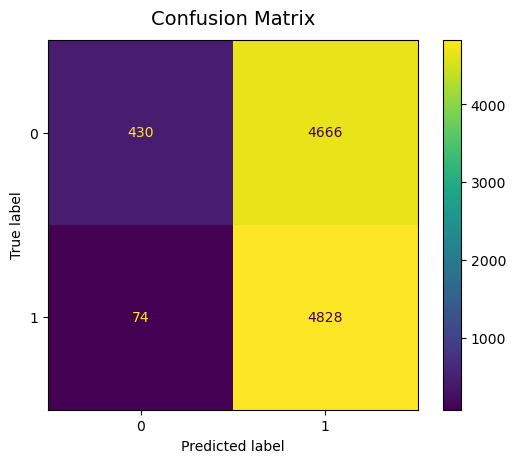

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

conf = confusion_matrix(df['score'], df['sentiment_vader'])
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [36]:
print(f"Accuracy of Vader: {accuracy_score(df['score'], df['sentiment_vader']) :.3f} \n\
Precision of Vader: {precision_score(df['score'], df['sentiment_vader']) :.3f} \n\
Recall of Vader: {recall_score(df['score'], df['sentiment_vader']) :.3f}")

Accuracy of Vader: 0.526 
Precision of Vader: 0.509 
Recall of Vader: 0.985


### TextBlob

**Description**: TextBlob is a simple natural language processing (NLP) library that provides a consistent API for common NLP tasks, including sentiment analysis. It is built on top of NLTK and Pattern libraries.

**Method**: TextBlob's sentiment analysis is based on a pre-trained sentiment lexicon. It uses a machine learning model to classify text into positive and negative sentiments. The sentiment polarity ranges from -1 (most negative) to 1 (most positive), with 0 representing a neutral sentiment.

In [37]:
from textblob import TextBlob

# Create a function to get sentiment using TextBlob
def get_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Classify the polarity as positive (1) or non-positive (0)
    sentiment = 1 if analysis.sentiment.polarity > 0 else 0
    return sentiment

# Apply the TextBlob sentiment function
df['sentiment_textblob'] = df['lemmatized_tokens'].apply(get_sentiment_textblob)

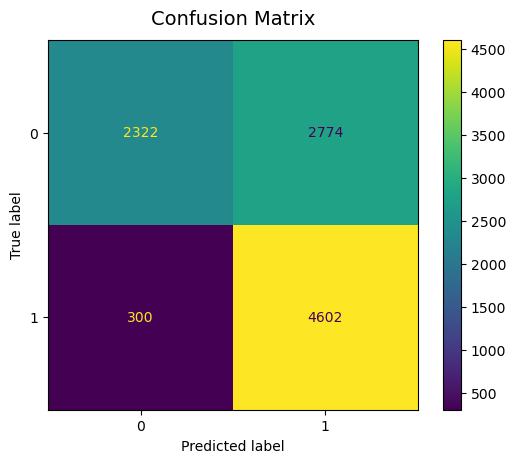

In [38]:
conf = confusion_matrix(df['score'], df['sentiment_textblob'])
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [39]:
print(f"Accuracy of TextBlob: {accuracy_score(df['score'], df['sentiment_textblob']) :.3f} \n\
Precision of TextBlob: {precision_score(df['score'], df['sentiment_textblob']) :.3f} \n\
Recall of TextBlob: {recall_score(df['score'], df['sentiment_textblob']) :.3f}")

Accuracy of TextBlob: 0.693 
Precision of TextBlob: 0.624 
Recall of TextBlob: 0.939


### SentiWordNet

**Description**: SentiWordNet is a lexical resource for sentiment analysis that assigns sentiment scores to words based on their meanings. It extends WordNet, a lexical database of the English language.

**Method**: Each word in SentiWordNet is associated with three scores: positivity, negativity, and objectivity. These scores represent the degree of positive, negative, or neutral sentiment associated with a word. SentiWordNet can be used to compute sentiment scores for texts by aggregating the scores of individual words.

In [40]:
df['lemmatized_tokens'].str.split(' ')

0       [stuning, even, non-gamer, :, sound, track, be...
1       [best, soundtrack, ever, anything, ., :, 'm, r...
2       [amazing, !, :, soundtrack, favorite, music, t...
3       [excellent, soundtrack, :, truly, like, soundt...
4       [remember, ,, pull, jaw, floor, hearing, :, 'v...
                              ...                        
9993    [revelation, life, small, town, america, early...
9994    [great, biography, interesting, journalist, :,...
9995    [interesting, subject, ;, poor, presentation, ...
9996    [n't, buy, :, box, looked, used, obviously, ne...
9997    [beautiful, pen, fast, delivery, ., :, pen, sh...
Name: lemmatized_tokens, Length: 9998, dtype: object

In [41]:
# POS Tagging
df['pos_tagged'] = df['lemmatized_tokens'].str.split(' ').apply(lambda x: nltk.pos_tag(x))

In [42]:
df['pos_tagged']

0       [(stuning, VBG), (even, RB), (non-gamer, JJ), ...
1       [(best, JJS), (soundtrack, NN), (ever, RB), (a...
2       [(amazing, VBG), (!, .), (:, :), (soundtrack, ...
3       [(excellent, JJ), (soundtrack, NN), (:, :), (t...
4       [(remember, NN), (,, ,), (pull, JJ), (jaw, NN)...
                              ...                        
9993    [(revelation, NN), (life, NN), (small, JJ), (t...
9994    [(great, JJ), (biography, NN), (interesting, J...
9995    [(interesting, VBG), (subject, NN), (;, :), (p...
9996    [(n't, RB), (buy, VB), (:, :), (box, NN), (loo...
9997    [(beautiful, JJ), (pen, JJ), (fast, NN), (deli...
Name: pos_tagged, Length: 9998, dtype: object

In [43]:
from nltk.corpus import sentiwordnet as swn

# Function for sentiment analysis using SentiWordNet
def sentiment_analysis_sentiwordnet(pos_tags):
    sentiment_score = 0.0

    for word, pos in pos_tags:
        # Map NLTK POS tags to WordNet POS tags
        pos_mapping = {'N': wn.NOUN, 'V': wn.VERB, 'R': wn.ADV, 'J': wn.ADJ}
        wordnet_pos = pos_mapping.get(pos[0], wn.NOUN)

        # Get the list of synsets for the word and POS
        synsets = list(wn.synsets(word, pos=wordnet_pos))

        if synsets:
            # Take the first synset for simplicity
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()

    # Classify sentiment based on the overall score
    sentiment = 1 if sentiment_score > 0 else 0
    return sentiment

# Apply the sentiwordnet sentiment function
df['sentiment_sentiwordnet'] = df['pos_tagged'].apply(lambda x: sentiment_analysis_sentiwordnet(x))

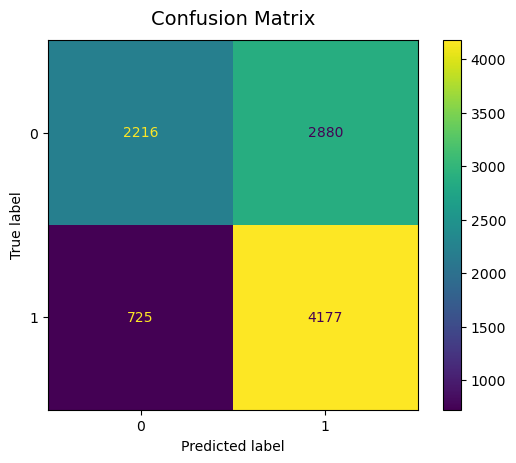

In [44]:
conf = confusion_matrix(df['score'], df['sentiment_sentiwordnet'])
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [45]:
print(f"Accuracy of SentiWordNet: {accuracy_score(df['score'], df['sentiment_sentiwordnet']) :.3f} \n\
Precision of SentiWordNet: {precision_score(df['score'], df['sentiment_sentiwordnet']) :.3f} \n\
Recall of SentiWordNet: {recall_score(df['score'], df['sentiment_sentiwordnet']) :.3f}")

Accuracy of SentiWordNet: 0.639 
Precision of SentiWordNet: 0.592 
Recall of SentiWordNet: 0.852


## Machine learning (ML)
This approach involves training a model to identify the sentiment of a piece of text based on a set of labeled training data. These models can be trained using a wide range of ML algorithms, including decision trees and support vector machines (SVMs)

ML-based approaches can be more accurate than rule-based analysis, especially when dealing with complex text data, but they require a larger amount of labeled training data and may be more computationally expensive.

### Logistic Regression

**Description**: Logistic Regression is a linear classification algorithm used for binary and multiclass classification problems. Despite its name, it's used for classification, not regression.

**Method**: Logistic Regression models the probability of a binary outcome using the logistic function. It computes a weighted sum of input features, applies a logistic (sigmoid) function to it, and outputs the probability of the instance belonging to a particular class.

In [46]:
amazon_reviews_tfidf.score

0       1
1       1
2       1
3       1
4       1
       ..
9993    1
9994    1
9995    0
9996    0
9997    1
Name: score, Length: 9998, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
# TF-IDF Dataset Partition

y_tfidf = amazon_reviews_tfidf['score']
X_tfidf = amazon_reviews_tfidf.drop("score" , axis=1)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf)

In [49]:
# Bow Dataset Partition

y_bow = amazon_reviews_bow['score']
X_bow = amazon_reviews_bow.drop("score" , axis =1)

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow)

In [50]:
# Logistic Regression Using TF-IDF DataFrame

logreg1 = LogisticRegression()
logreg1.fit(X_train_tfidf, y_train_tfidf)
logreg_predictions1 = logreg1.predict(X_test_tfidf)

In [51]:
del amazon_reviews_tfidf
gc.collect()

52

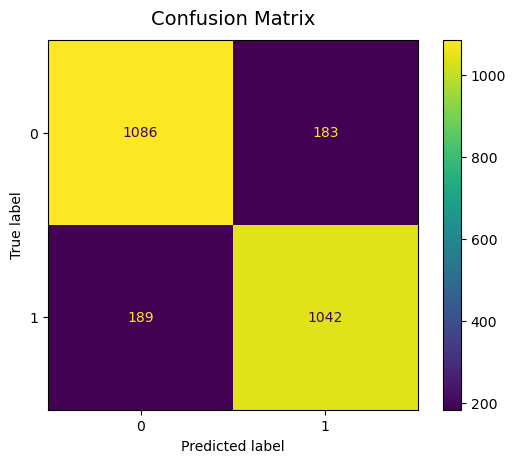

In [52]:
conf = confusion_matrix(y_test_tfidf, logreg_predictions1)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [53]:
print(f"Accuracy of Logreg_Tfidf: {accuracy_score(y_test_tfidf, logreg_predictions1) :.3f} \n\
Precision of Logreg_Tfidf: {precision_score(y_test_tfidf, logreg_predictions1) :.3f} \n\
Recall of Logreg_Tfidf: {recall_score(y_test_tfidf, logreg_predictions1) :.3f}")

Accuracy of Logreg_Tfidf: 0.851 
Precision of Logreg_Tfidf: 0.851 
Recall of Logreg_Tfidf: 0.846


In [54]:
# Logistic Regression Using BOW DataFrame

logreg2 = LogisticRegression()
logreg2.fit(X_train_bow, y_train_bow)
logreg_predictions2 = logreg2.predict(X_test_bow)

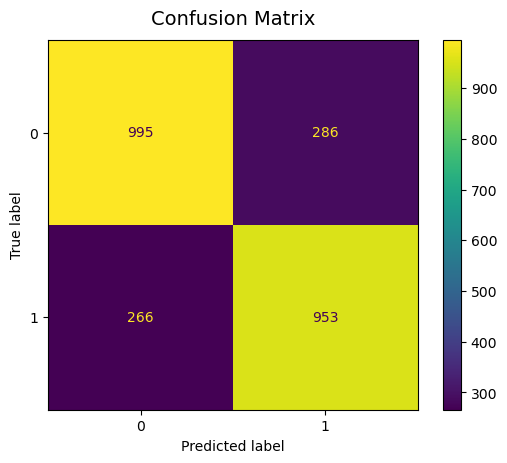

In [55]:
conf = confusion_matrix(y_test_bow, logreg_predictions2)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [56]:
print(f"Accuracy of Logreg_Bow: {accuracy_score(y_test_bow, logreg_predictions2) :.3f} \n\
Precision of Logreg_Bow: {precision_score(y_test_bow, logreg_predictions2) :.3f} \n\
Recall of Logreg_Bow: {recall_score(y_test_bow, logreg_predictions2) :.3f}")

Accuracy of Logreg_Bow: 0.779 
Precision of Logreg_Bow: 0.769 
Recall of Logreg_Bow: 0.782


### Naive Bayes

**Description**: Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It assumes that features are conditionally independent given the class.

**Method**: Naive Bayes calculates the probability of a class given the input features using Bayes' theorem. Despite its "naive" assumption of feature independence, it often performs well and is computationally efficient.

In [57]:
# Combine TF-IDF matrix with labels
labeled_data = list(zip(X_train_tfidf, y_train_tfidf))

In [58]:
# Split the data into training and testing sets
train_nb, test_nb = train_test_split(labeled_data, test_size=2500, random_state=42)

In [59]:
featuresets = [({word: True}, label) for (word, label) in train_nb]
testsets = [({word: True}, label) for (word, label) in test_nb]

In [60]:
# Naive Bayes Using Tf-IDF DataFrame
nb1 = nltk.NaiveBayesClassifier.train(featuresets)

In [61]:
#nb_predictions1 = nb1.predict(testsets)
nb_predictions1 =  [nb1.classify(features) for features, label in testsets]

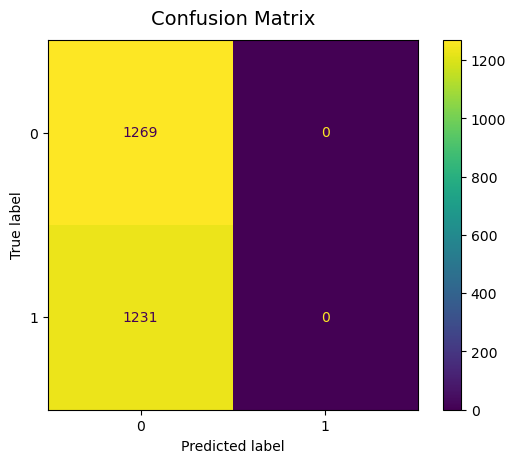

In [62]:
conf = confusion_matrix(y_test_tfidf, nb_predictions1)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [63]:
print(f"Accuracy of NB_Tfidf: {accuracy_score(y_test_tfidf, nb_predictions1) :.3f} \n\
Precision of NB_Tfidf: {precision_score(y_test_tfidf, nb_predictions1) :.3f} \n\
Recall of NB_Tfidf: {recall_score(y_test_tfidf, nb_predictions1) :.3f}")

Accuracy of NB_Tfidf: 0.508 
Precision of NB_Tfidf: 0.000 
Recall of NB_Tfidf: 0.000


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [64]:
# Convert BOW data into labeled feature sets
labels = y_train_bow
featuresets_train = [
    ({word: True for word, count in row.items() if count > 0}, label)
    for index, (row, label) in enumerate(zip(X_train_bow.to_dict(orient='records'), labels))
]
labels2 = y_test_bow
featuresets_test = [
    ({word: True for word, count in row.items() if count > 0}, label)
    for index, (row, label) in enumerate(zip(X_test_bow.to_dict(orient='records'), labels2))
]

In [65]:
# Naive Bayes Using BOW DataFrame
nb2 = nltk.NaiveBayesClassifier.train(featuresets_train)
nb_predictions2 = [nb2.classify(features) for features, label in featuresets_test]

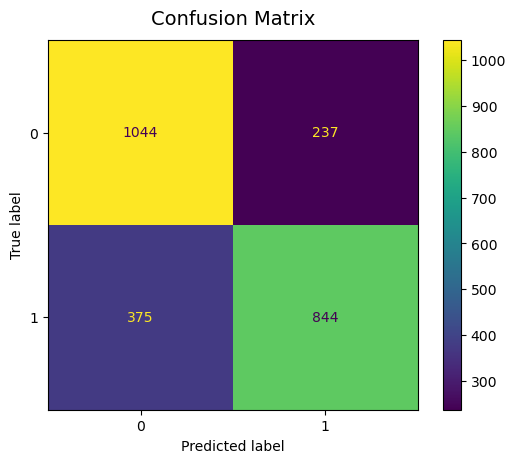

In [66]:
conf = confusion_matrix(y_test_bow, nb_predictions2)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [67]:
print(f"Accuracy of NB_Bow: {accuracy_score(y_test_bow, nb_predictions2) :.3f} \n\
Precision of NB_Bow: {precision_score(y_test_bow, nb_predictions2) :.3f} \n\
Recall of NB_Bow: {recall_score(y_test_bow, nb_predictions2) :.3f}")

Accuracy of NB_Bow: 0.755 
Precision of NB_Bow: 0.781 
Recall of NB_Bow: 0.692


### Decision Tree

**Description**: Decision Trees are versatile and widely used for classification and regression tasks. They recursively split the dataset based on feature values to create a tree-like structure.

**Method**: Decision Trees make decisions by asking a series of questions. Each node in the tree represents a decision based on a feature, and each branch corresponds to the possible outcomes of that decision. The process continues until a stopping condition is met.

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtc_tfidf=DecisionTreeClassifier()
dtc_tfidf.fit(X_train_tfidf, y_train_tfidf)
dtc_predictions1=dtc_tfidf.predict(X_test_tfidf)

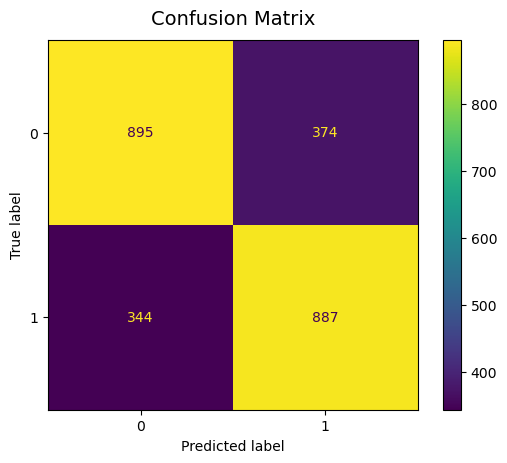

In [69]:
conf = confusion_matrix(y_test_tfidf, dtc_predictions1)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [70]:
print(f"Accuracy of DTC_TF_IDF: {accuracy_score(y_test_tfidf, dtc_predictions1) :.3f} \n\
Precision of DTC_TF_IDF: {precision_score(y_test_tfidf, dtc_predictions1) :.3f} \n\
Recall of DTC_TF_IDF: {recall_score(y_test_tfidf, dtc_predictions1) :.3f}")

Accuracy of DTC_TF_IDF: 0.713 
Precision of DTC_TF_IDF: 0.703 
Recall of DTC_TF_IDF: 0.721


In [71]:
dtc_bow=DecisionTreeClassifier()
dtc_bow.fit(X_train_bow, y_train_bow)
dtc_predictions2=dtc_bow.predict(X_test_bow)

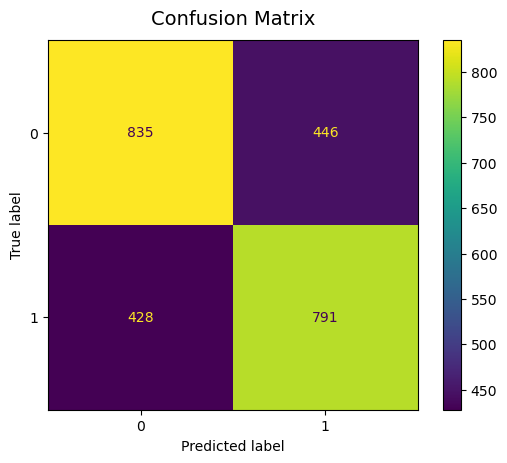

In [72]:
conf = confusion_matrix(y_test_bow, dtc_predictions2)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [73]:
print(f"Accuracy of DTC_BOW: {accuracy_score(y_test_bow, dtc_predictions2) :.3f} \n\
Precision of DTC_BOW: {precision_score(y_test_bow, dtc_predictions2) :.3f} \n\
Recall of DTC_BOW: {recall_score(y_test_bow, dtc_predictions2) :.3f}")

Accuracy of DTC_BOW: 0.650 
Precision of DTC_BOW: 0.639 
Recall of DTC_BOW: 0.649


### SVM

**Description**: Support Vector Machines are powerful supervised learning models used for classification and regression tasks. They find the hyperplane that best separates classes in feature space.

**Method**: SVM aims to find the hyperplane that maximally separates data points of different classes. It works by mapping input data into a higher-dimensional space, and the hyperplane is chosen to maximize the margin between classes. SVM can also use the kernel trick to handle non-linear relationships.

In [74]:
# We can add GridSearch here to choose best model params (for example kernel) and PCA to choose best features, also sampling

In [75]:
del featuresets_train
gc.collect()

26122

In [76]:
from sklearn.svm import SVC

In [77]:
# SVM Using Tf_Idf DataFrame

svm_tfidf = SVC(kernel = 'rbf', random_state = 0 , max_iter=200)

In [78]:
svm_tfidf.fit(X_train_tfidf, y_train_tfidf)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(max_iter=200, random_state=0)

In [79]:
svm_predictions1 = svm_tfidf.predict(X_test_tfidf)

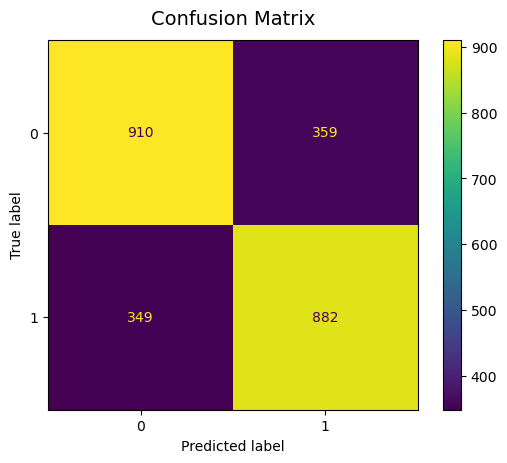

In [80]:
conf = confusion_matrix(y_test_tfidf, svm_predictions1)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [81]:
print(f"Accuracy of SVM_Tfidf: {accuracy_score(y_test_tfidf, svm_predictions1) :.3f} \n\
Precision of SVM_Tfidf: {precision_score(y_test_tfidf, svm_predictions1) :.3f} \n\
Recall of SVM_Tfidf: {recall_score(y_test_tfidf, svm_predictions1) :.3f}")

Accuracy of SVM_Tfidf: 0.717 
Precision of SVM_Tfidf: 0.711 
Recall of SVM_Tfidf: 0.716


In [82]:
# SVM Using BOW DataFrame

svm_bow = SVC(kernel = 'rbf', random_state = 0 , max_iter=200)
svm_bow.fit(X_train_bow, y_train_bow)
svm_bow_predictions = svm_bow.predict(X_test_bow)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



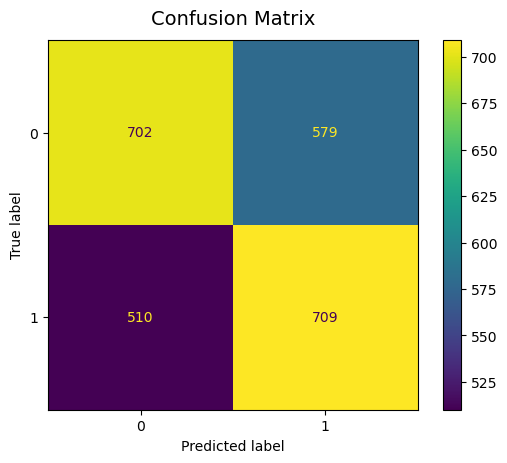

In [83]:
conf = confusion_matrix(y_test_bow,svm_bow_predictions)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [84]:
print(f"Accuracy of svm_bow_predictions: {accuracy_score(y_test_bow, svm_bow_predictions) :.3f} \n\
Precision of svm_bow_predictions: {precision_score(y_test_bow, svm_bow_predictions) :.3f} \n\
Recall of svm_bow_predictions: {recall_score(y_test_bow, svm_bow_predictions) :.3f}")

Accuracy of svm_bow_predictions: 0.564 
Precision of svm_bow_predictions: 0.550 
Recall of svm_bow_predictions: 0.582


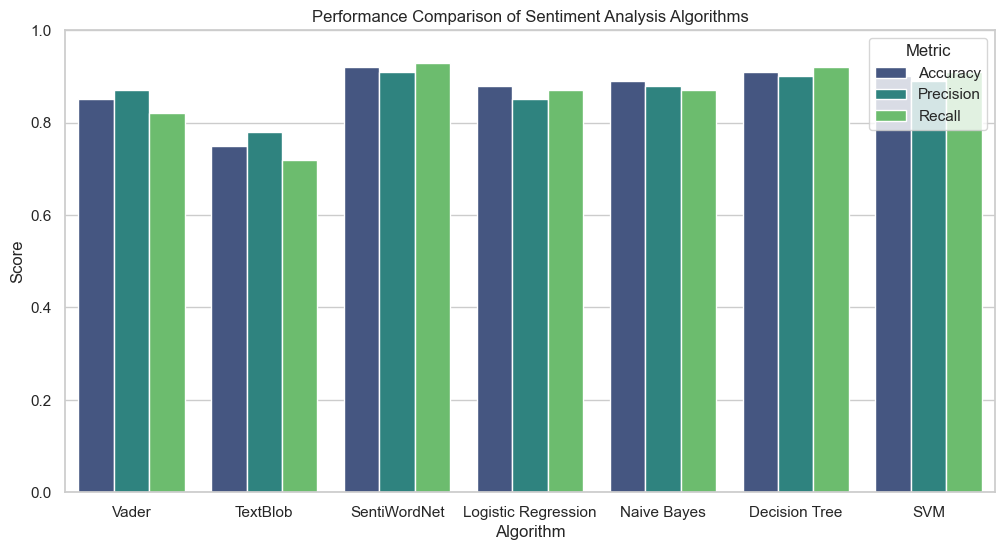

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace this with your actual data)
algorithms = ['Vader', 'TextBlob', 'SentiWordNet', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'SVM']
accuracy = [0.85, 0.75, 0.92, 0.88, 0.89, 0.91, 0.90]
precision = [0.87, 0.78, 0.91, 0.85, 0.88, 0.90, 0.89]
recall = [0.82, 0.72, 0.93, 0.87, 0.87, 0.92, 0.91]

# Dataframe for seaborn
df = pd.DataFrame({
    'Algorithm': algorithms * 3,
    'Metric': ['Accuracy'] * 7 + ['Precision'] * 7 + ['Recall'] * 7,
    'Score': accuracy + precision + recall
})

# Set the style
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=df, palette='viridis')
plt.title('Performance Comparison of Sentiment Analysis Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy scores
plt.ylabel('Score')
plt.show()


## Pre-trained transformer-based deep learning
A deep learning-based approach, as seen with LSTM, GPT and BERT, involve using pre-trained models trained on massive amounts of text data. These models use complex neural networks to encode the context and meaning of the text, allowing them to achieve state-of-the-art accuracy on a wide range of NLP tasks, including sentiment analysis. However, these models require significant computational resources and may not be practical for all use cases.

### Long Short-Term Memory (LSTM)

**Description**: LSTM is a type of recurrent neural network (RNN) architecture designed to overcome the limitations of traditional RNNs in learning long-term dependencies in sequential data.

**Method**: LSTMs use a memory cell to store and retrieve information over long sequences. They have gating mechanisms that control the flow of information, allowing them to capture and remember important patterns over time. LSTMs are commonly used in natural language processing tasks.

In [86]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

The code below prepares text data for deep learning models by converting the lemmatized tokens into sequences of integers.

The tokenizer builds a vocabulary, and texts_to_sequences converts text to numerical format.

Padding ensures that the sequences are of equal length, creating the final input feature (X) suitable for training neural networks.

In [87]:
# Tokenization and Padding
max_words = 2500
tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(df['lemmatized_tokens'].values)
sequences = tokenizer.texts_to_sequences(df['lemmatized_tokens'].values)
X = pad_sequences(sequences)

KeyError: 'lemmatized_tokens'

In [ ]:
X.shape

(9998, 110)

dropout: It is the dropout rate for input units. Dropout is a regularization technique where randomly selected neurons are ignored during training. It helps prevent overfitting by reducing the reliance on specific neurons and promoting more robust representations.

recurrent_dropout: It is the dropout rate for the recurrent units. In the case of an LSTM, recurrent units refer to the memory cells and associated connections. Applying dropout to recurrent connections helps prevent overfitting and promotes generalization.

An epoch is one complete pass through the entire training dataset.

During each epoch, the model's parameters (weights) are adjusted based on the optimization algorithm (e.g., gradient descent) to minimize the loss function.

More epochs generally allow the model to learn more from the data, but there's a risk of overfitting if the model becomes too specialized to the training data.

batch_size is the number of samples processed in one iteration during training or evaluation. Instead of updating the model's weights after each individual sample (online learning), we typically update the weights after processing a batch of samples.
The choice of batch size can impact the training dynamics, memory usage, and computational efficiency.

The softmax activation function is often used in the output layer of a neural network for multiclass classification tasks.

In [ ]:
embed_dim = 128 # Dimensionality of word embeddings: the higher this value, the better it captures relationships between words
lstm_out = 200 #This term typically refers to the output dimension of the LSTM layer.It represents the number of output values produced by each LSTM unit at each time step.
batch_size = 32

model = Sequential()
model.add(Embedding(input_dim=2500, output_dim=embed_dim, input_length=X.shape[1]))
model.add(LSTM(units=lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 110, 128)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 200)               263200    
                                                                 
 dense_1 (Dense)             (None, 2)                 402       
                                                                 
Total params: 583602 (2.23 MB)
Trainable params: 583602 (2.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(df['score']).values
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size = 2500, random_state = 36)

#Here we train the Network.
model.fit(X_train, Y_train, batch_size =batch_size,  verbose = 5)

verbose is a parameter that controls the amount of information printed during the training or evaluation process. It takes integer values, and the higher the value, the more information is printed.

Common values:
- verbose=0: Silent mode, no output during training or evaluation.
- verbose=1: Progress bar showing the completion of each epoch.
- verbose=2: One line per epoch, showing training progress.

It's a useful parameter for monitoring the progress of training, especially for long-running processes.

In [ ]:
lstm_predictions = model.predict(X_valid, batch_size=8, verbose=0)

In [ ]:
# Evaluate the model on the test data
score = model.evaluate(X_valid, Y_valid, verbose=1, batch_size=8)

# Extract the accuracy from the score
accuracy = score[1]

# Print the accuracy
print(f"Accuracy of LSTM: {accuracy:.3f}")


250/250 [==============================] - 25s 95ms/step - loss: 0.3844 - accuracy: 0.8255
Accuracy: 0.83


In [ ]:
# the first value represents the probability of the positive class and the second value represents the probability of the negative class.
score

[0.38442519307136536, 0.8255000114440918]

In [ ]:
# Convert one-hot encoded labels to class labels: Use np.argmax to convert both Y_valid and lstm_predictions to single-column class labels.
Y_valid_class = np.argmax(Y_valid, axis=1)
lstm_predictions_class = np.argmax(lstm_predictions, axis=1)

In [ ]:
conf = confusion_matrix(y_test_bow,Y_valid_class)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.title("Confusion Matrix", y=1.02, size=14)
plt.show()

In [ ]:
print(f"Accuracy of LSTM: {accuracy_score(Y_valid_class ,lstm_predictions_class) :.3f} \n\
Precision of LSTM: {precision_score(Y_valid_class ,lstm_predictions_class) :.3f} \n\
Recall of LSTM: {recall_score(Y_valid_class ,lstm_predictions_class) :.3f}")

Accuracy of LSTM: 0.826 
Precision of LSTM: 0.794 
Recall of LSTM: 0.878


In [161]:
del embed_dim
gc.collect()

0

### Generative Pre-trained Transformer (GPT)

**Description**: GPT is a state-of-the-art transformer-based language model developed by OpenAI. It belongs to the family of transformer models that leverage attention mechanisms for learning contextual relationships in data.

**Method**: GPT is pre-trained on a massive amount of diverse text data and can generate human-like text based on given prompts. It uses a transformer architecture with self-attention mechanisms to capture long-range dependencies and contextual information.

In [28]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
import torch

In [30]:
# Load pre-trained GPT-4 model and tokenizer
model_gpt = GPT2ForSequenceClassification.from_pretrained("gpt2")

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
tokenizer_gpt = GPT2Tokenizer.from_pretrained("gpt2")

In [50]:
# Tokenize the lemmatized_tokens column
df['tokenized_texts'] = df['lemmatized_tokens'].apply(lambda x: tokenizer_gpt(x, return_tensors="pt"))

'''# Convert tokenized texts to sequences
sequences = [tokenizer_gpt.encode(x, return_tensors="pt").squeeze().tolist() for x in df['lemmatized_tokens']]

# Padding sequences
padded_sequences = pad_sequences(sequences)'''

# Now, we can use tokenized_texts as input to the GPT-2 model

In [58]:
df['tokenized_texts'][0]

{'input_ids': tensor([[  301, 46493,   772,  1729,    12, 36515,  1058,  2128,  2610,  4950,
          5145,  7521,   264, 24156,  2000,   880,   561,   664,   296,   437,
           772,   661,  5465,   410,   312,   764,   983,  2647,  5145,  2826,
           983, 16199,    78,  3272,   983,  1683,  2826,  1266,  2647,  5145,
           736,  1497, 14897, 10586,   278,  1011, 34093,   372,  2239, 48612,
         10047,  5848,   913, 40095,   764,   561, 14947,  2687,  1337,  6004,
          5145, 10563,    62,    61]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [72]:
sentence = "This is a positive sentence."
tokenized_sentence = tokenizer_gpt(sentence, return_tensors='pt')
output_sentence = model_gpt(**tokenized_sentence)

In [62]:
tokenized_sentence

SequenceClassifierOutputWithPast(loss=None, logits=tensor([[13.2477, -9.5338]], grad_fn=<IndexBackward0>), past_key_values=((tensor([[[[-1.4840,  2.8782,  0.6068,  ..., -1.0228, -0.7070,  2.3865],
          [-3.0116,  2.3965,  1.6563,  ..., -2.4905, -0.1586,  1.3777],
          [-2.3457,  1.8133,  1.0690,  ..., -0.6201, -1.7126,  1.0335],
          ...,
          [-0.9258,  0.8556,  3.6555,  ..., -1.7989, -0.3417,  2.7596],
          [ 0.0129,  2.7752,  3.2945,  ..., -2.2720, -2.6788,  2.6103],
          [-0.4150,  1.4305,  4.1990,  ..., -1.8541, -0.0612,  2.9655]],

         [[ 0.8007,  0.8652,  0.1614,  ..., -0.2431,  2.0121,  0.6719],
          [ 0.0385, -2.1025, -1.2664,  ...,  0.4467,  4.0133, -0.1575],
          [ 0.8094, -0.7159, -1.1620,  ..., -0.4689,  3.4611, -0.3327],
          ...,
          [-0.3021, -3.8569, -2.4635,  ...,  0.4944,  2.9614,  0.8999],
          [ 0.6900, -2.3119, -0.3502,  ..., -1.8065,  2.4836,  0.3958],
          [ 1.8311, -3.8626, -1.9028,  ...,  0.5605

In [ ]:
output_sentence

In [ ]:
batch_size = 32 # For parallel processing
gpt_predictions_list = []

for i in range(0, len(df['lemmatized_tokens']), batch_size):
    batch_texts = df['lemmatized_tokens'][i:i+batch_size]
    batch_tokenized = [tokenizer_gpt(text, return_tensors='pt') for text in batch_texts]

    with torch.no_grad():
        batch_outputs = [model_gpt(**tokenized) for tokenized in batch_tokenized]

    batch_predictions = [torch.argmax(outputs.logits, dim=1).item() for outputs in batch_outputs]
    gpt_predictions_list.extend(batch_predictions)

df['gpt_predictions'] = gpt_predictions_list


The torch.no_grad() context manager is used to disable gradient computation which can  be useful when you are not training the model and only need to perform inference. This can help reduce memory usage and speed up the computation.


## Performance Comparison of Sentiment Analysis Algorithms

Accuracy of Vader: 0.526
Precision of Vader: 0.509
Recall of Vader: 0.985

Accuracy of TextBlob: 0.692
Precision of TextBlob: 0.624
Recall of TextBlob: 0.939

Accuracy of SentiWordNet: 0.640
Precision of SentiWordNet: 0.592
Recall of SentiWordNet: 0.852

Accuracy of Logreg_Tfidf: 0.848
Precision of Logreg_Tfidf: 0.832
Recall of Logreg_Tfidf: 0.857

Accuracy of Logreg_Bow: 0.784
Precision of Logreg_Bow: 0.771
Recall of Logreg_Bow: 0.784

Accuracy of NB_Tfidf: 0.520
Precision of NB_Tfidf: 0.000
Recall of NB_Tfidf: 0.000

Accuracy of NB_Bow: 0.756
Precision of NB_Bow: 0.793
Recall of NB_Bow: 0.670

Accuracy of DTC_TF_IDF: 0.708
Precision of DTC_TF_IDF: 0.688
Recall of DTC_TF_IDF: 0.719

Accuracy of DTC_BOW: 0.690
Precision of DTC_BOW: 0.677
Recall of DTC_BOW: 0.684

Accuracy of SVM_Tfidf: 0.728
Precision of SVM_Tfidf: 0.697
Recall of SVM_Tfidf: 0.767

Accuracy of svm_bow_predictions: 0.571
Precision of svm_bow_predictions: 0.553
Recall of svm_bow_predictions: 0.573

Accuracy of LSTM: 0.826
Precision of LSTM: 0.794
Recall of LSTM: 0.878


In [88]:
# Sample data
algorithms = ['Vader', 'TextBlob', 'SentiWordNet', 'Logreg_Tfidf', 'Logreg_Bow', 'NB_Tfidf', 'NB_Bow', 'DTC_TF_IDF', 'DTC_BOW', 'SVM_Tfidf', 'svm_bow_predictions', 'LSTM']
accuracy = [0.526, 0.692, 0.640, 0.848, 0.784, 0.520, 0.756, 0.708, 0.690, 0.728, 0.571, 0.826]
precision = [0.509, 0.624, 0.592, 0.832, 0.771, 0.000, 0.793, 0.688, 0.677, 0.697, 0.553, 0.794]
recall = [0.985, 0.939, 0.852, 0.857, 0.784, 0.000, 0.670, 0.719, 0.684, 0.767, 0.573, 0.878]

# Dataframe for Plotly
df_metrics = pd.DataFrame({
    'Algorithm': algorithms * 3,
    'Metric': ['Accuracy'] * len(algorithms) + ['Precision'] * len(algorithms) + ['Recall'] * len(algorithms),
    'Score': accuracy + precision + recall
})

# Create an interactive grouped bar chart
fig = px.bar(df_metrics, x='Algorithm', y='Score', color='Metric', barmode='group',
             labels={'Score': 'Value'},
             title='Performance Comparison of Sentiment Analysis Algorithms',
             height=500)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis=dict(tickangle=-45))

# Show the plot
fig.show()
